# Финальный проект. SQL

**Описание**

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Задания**

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

**Структура базы данных**

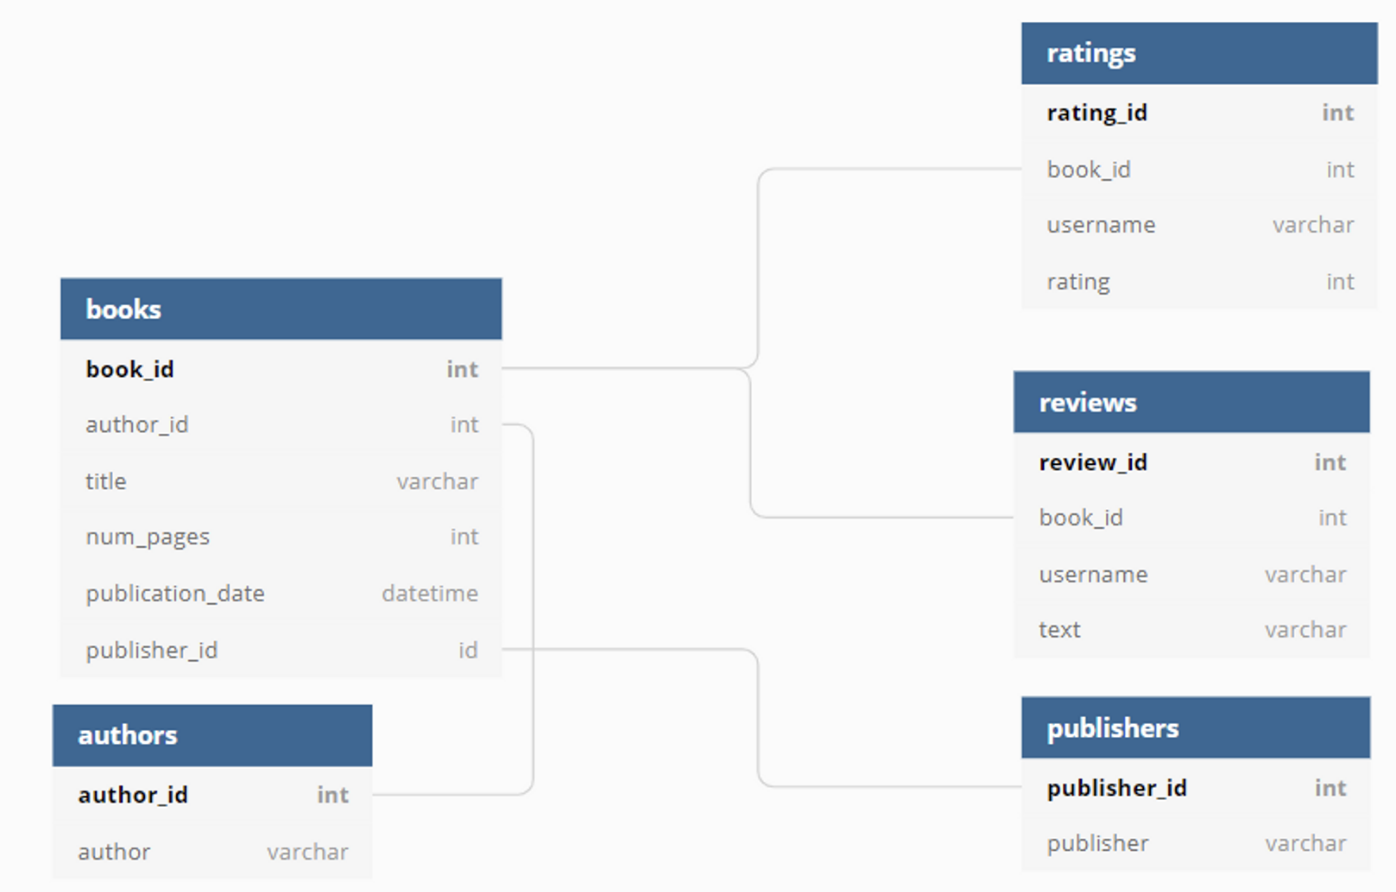

## Изучим данные

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', 
 'pwd': 'Sdf4$2;d-d30pp', 
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' SELECT * FROM {}; 
    '''.format(table) 

    request = pd.io.sql.read_sql(query, con = engine) 
#     print(f'Таблица - "{table}"')
    display(request.head())
    print(request.info())
    print(f'Таблица - "{table}"')
    print('---------------------------------------------------------------------------------------------------')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None
Таблица - "books"
---------------------------------------------------------------------------------------------------


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None
Таблица - "authors"
---------------------------------------------------------------------------------------------------


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None
Таблица - "publishers"
---------------------------------------------------------------------------------------------------


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None
Таблица - "ratings"
---------------------------------------------------------------------------------------------------


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None
Таблица - "reviews"
---------------------------------------------------------------------------------------------------


**Описание данных**

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

In [3]:
# какие ещё таблицы доступны в базе
display(pd.io.sql.read_sql('''

SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND
      schemaname != 'information_schema';

''', con = engine))


# смотрим на типы столбцов в интересующих таблицах
display(pd.io.sql.read_sql('''
SELECT 
    table_name, 
    column_name, 
    data_type, 
    is_nullable
FROM INFORMATION_SCHEMA.COLUMNS 
WHERE table_name IN ('books', 'authors', 'publishers', 'ratings', 'reviews');
''', con = engine))

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,orders,praktikum_admin,None,True,False,False,False
1,public,visits,praktikum_admin,None,True,False,False,False
2,public,advertisment_costs,praktikum_admin,None,True,False,False,False
3,public,authors,praktikum_admin,None,True,False,True,False
4,public,second,praktikum_student,None,False,False,False,False
5,public,second_b,praktikum_student,None,False,False,False,False
6,public,publishers,praktikum_admin,None,True,False,True,False
7,public,author,praktikum_student,None,True,False,False,False
8,public,reviews,praktikum_admin,None,True,False,True,False
9,public,ratings,praktikum_admin,None,True,False,True,False


,table_name,column_name,data_type,is_nullable
0,authors,author_id,integer,NO
1,authors,author,text,YES
2,publishers,publisher_id,integer,NO
3,publishers,publisher,text,YES
4,reviews,review_id,integer,NO
5,reviews,book_id,integer,YES
6,reviews,username,text,YES
7,reviews,text,text,YES
8,ratings,rating_id,integer,NO
9,ratings,book_id,integer,YES


## Задание 1

Посчитайте, сколько книг вышло после 1 января 2000 года;

In [4]:
task1 = ''' 
SELECT COUNT(*) 
FROM books
WHERE publication_date > '2000-1-1'; 
''' 

one = pd.io.sql.read_sql(task1, con = engine)
one

,count
0,819


**Вывод:**

После 1 января 2000 года вышло 819 книг

## Задание 2

Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [5]:
task2 = ''' 

SELECT 
    books.title AS book_name,
    books.book_id AS id,
    SubRev.n_rev AS reviews,
    SubRat.avg_rat AS avg_rating
FROM books LEFT JOIN 
                (SELECT
                    book_id,
                    AVG(rating) AS avg_rat
                FROM
                    ratings
                GROUP BY 
                    book_id
                ) AS SubRat ON SubRat.book_id = books.book_id
        LEFT JOIN
                (SELECT 
                    book_id,
                    COUNT(review_id) AS n_rev
                FROM
                    reviews
                GROUP BY 
                    book_id
                ) AS SubRev ON SubRev.book_id = books.book_id
                
; ''' 

two = pd.io.sql.read_sql(task2, con = engine)
two

,book_name,id,reviews,avg_rating
0,The Body in the Library (Miss Marple #3),652,2.0,4.500000
1,Galápagos,273,2.0,4.500000
2,A Tree Grows in Brooklyn,51,5.0,4.250000
3,Undaunted Courage: The Pioneering First Missio...,951,2.0,4.000000
4,The Prophet,839,4.0,4.285714
...,...,...,...,...
995,Alice in Wonderland,64,4.0,4.230769
996,A Woman of Substance (Emma Harte Saga #1),55,2.0,5.000000
997,Christine,148,3.0,3.428571
998,The Magicians' Guild (Black Magician Trilogy #1),790,2.0,3.500000


**Вывод:**

Посчитали для каждой книги количество обзоров и среднюю оценку

## Задание 3

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [6]:
task3 = ''' 
SELECT
    T.publisher_id,
    T.publisher,
    T.n_books
FROM
    (SELECT 
        books.publisher_id AS publisher_id,
        COUNT(books.book_id) AS n_books,
        publishers.publisher AS publisher 
    FROM 
        books 
        LEFT JOIN publishers ON books.publisher_id=publishers.publisher_id

    WHERE 
        num_pages>50
    GROUP BY
        books.publisher_id,
        publishers.publisher
    ORDER BY 
        n_books DESC) AS T
LIMIT 1
; ''' 

three = pd.io.sql.read_sql(task3, con = engine)
three

,publisher_id,publisher,n_books
0,212,Penguin Books,42


**Вывод:**

Издательство Penguin Books выпустило больше всех книг - 42

## Задание 4

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [7]:
task4 = ''' 
SELECT 
    aut_avg.author,
    AVG(aut_avg.avg_rating) AS avg_avg_rating
FROM
        (SELECT 
            authors.author AS author
           , AVG(ratings.rating) AS avg_rating
        FROM books
            LEFT JOIN authors ON books.author_id = authors.author_id
            LEFT JOIN ratings ON books.book_id = ratings.book_id
        GROUP BY 
             books.book_id
             , authors.author_id
        HAVING
            COUNT(ratings.rating_id) >=50 
        ) AS aut_avg 
GROUP BY    
    aut_avg.author
ORDER BY
    avg_avg_rating DESC
LIMIT 5
    
; ''' 

four = pd.io.sql.read_sql(task4, con = engine)
four

,author,avg_avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


**Вывод:**

Самая высокая средняя оценка книг у автора - J.K. Rowling/Mary GrandPré - 4.283844

## Задание 5

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [8]:
task5 = ''' 

SELECT
    AVG(Sub.n_reviews)
FROM
    (SELECT
        username,
        COUNT(review_id) AS n_reviews
    FROM
        reviews
    WHERE 
        username IN (
                SELECT 
                    username
                FROM 
                    ratings
                GROUP BY 
                    username
                HAVING 
                    COUNT(rating_id) > 50
                    )
    GROUP BY 
        username
    ) AS Sub
; ''' 

five = pd.io.sql.read_sql(task5, con = engine)
five

,avg
0,24.333333


**Вывод:**

Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24